In [ ]:
%pip install -r ../requirements.txt

In [6]:
from schema.WLD import WLD

wld = WLD(file_path="../data/example-chappy.wld")

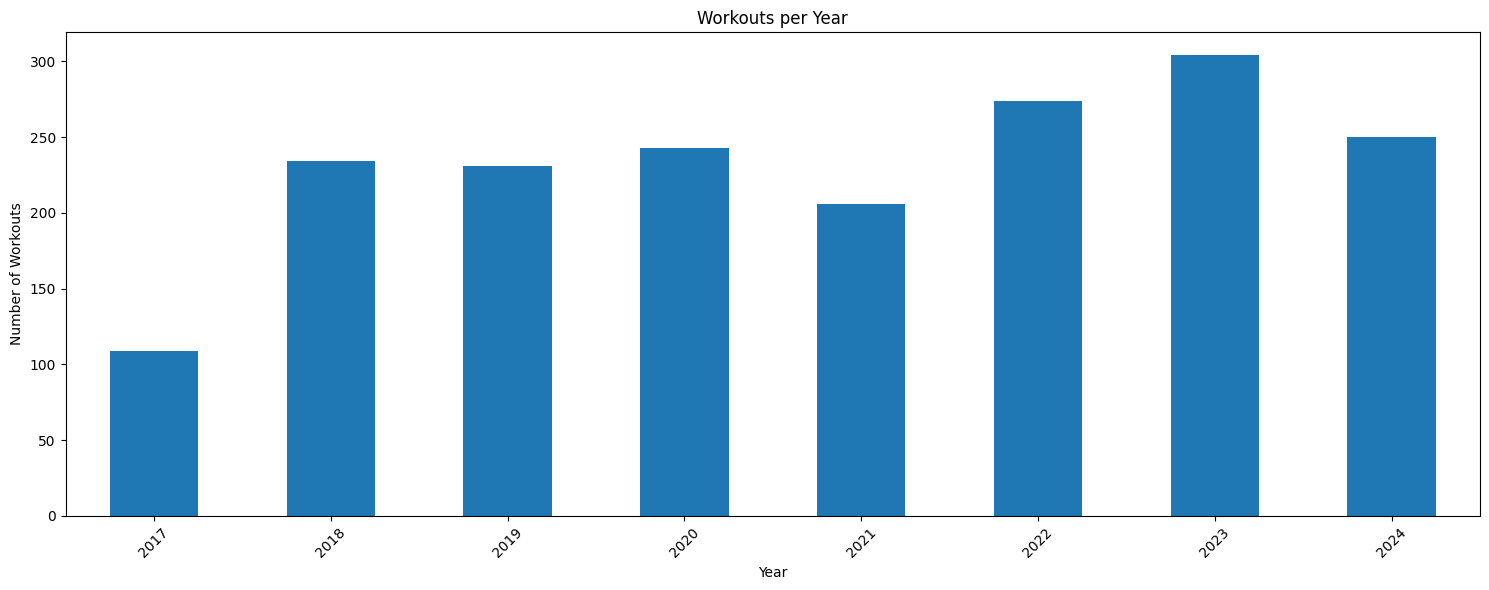

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract workout dates and convert to pandas datetime
workout_dates = [w.date for w in wld.workouts]
df = pd.DataFrame({"date": workout_dates})
df["date"] = pd.to_datetime(df["date"])  # Add this line to convert to datetime

# Create year column
df["year"] = df["date"].dt.to_period("Y")

# Count workouts per year
yearly_counts = df["year"].value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(15, 6))
yearly_counts.plot(kind="bar")
plt.title("Workouts per Year")
plt.xlabel("Year")
plt.ylabel("Number of Workouts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

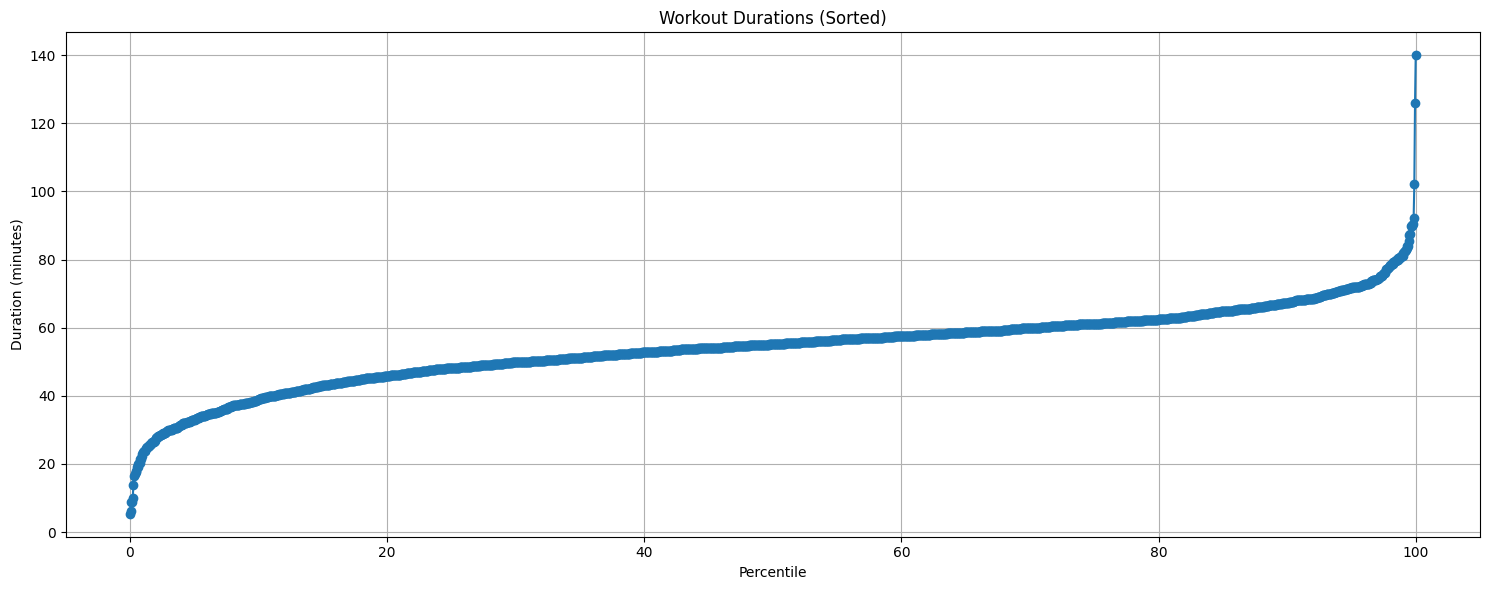

In [8]:
# Extract workout durations in seconds and convert to minutes
workout_durations = [w.duration / 60 for w in wld.workouts]
workout_dates = [w.date for w in wld.workouts]

# Create DataFrame with dates and durations
df_duration = pd.DataFrame({
    'date': workout_dates,
    'duration': workout_durations
})
df_duration['date'] = pd.to_datetime(df_duration['date'])

# Sort by duration
df_duration_sorted = df_duration.sort_values('duration')

# Plot
plt.figure(figsize=(15, 6))
plt.plot(
    [i * 100.0 / (len(df_duration_sorted) - 1) for i in range(len(df_duration_sorted))],
    df_duration_sorted['duration'],
    marker='o'
)
plt.title('Workout Durations (Sorted)')
plt.xlabel('Percentile')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()
